# Absenteeism at Work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Markdown,display

def printmd(string, color="purple"):
    colorstr = "<span style = 'color:{}' >{}</span>".format(color,string)
    display(Markdown(colorstr))

### We will use "IPython.display" for print function to see the bold & colorfull text

In [2]:
df = pd.read_csv("Absenteeism_at_work.csv")

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


# EDA

### Preprocessing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

####  we can clearly see only one is Object Dtype and the rest all are int64
####  One object is Work load average/day

In [5]:
df.columns = df.columns.str.replace("/", "per").str.strip()

In [6]:
df.groupby("ID")[["ID"]].count().head()

,ID
ID,
1,23
2,6
3,113
4,1
5,19


##### From above we can easily understand this is not a regular attendence dataset, actually it has only absent hours of employees

In [7]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [8]:
df.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Averageperday            object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

##### Now we will see the columns name with its max & min values

In [9]:
for column in df.columns:
    
    printmd(f"**===Column: {column}====**")
    printmd(f"**Number of unique values: {df[column].nunique()}**")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")

<span style = 'color:purple' >**===Column: ID====**</span>

<span style = 'color:purple' >**Number of unique values: 36**</span>

Max: 36
Min: 1


<span style = 'color:purple' >**===Column: Reason for absence====**</span>

<span style = 'color:purple' >**Number of unique values: 28**</span>

Max: 28
Min: 0


<span style = 'color:purple' >**===Column: Month of absence====**</span>

<span style = 'color:purple' >**Number of unique values: 13**</span>

Max: 12
Min: 0


<span style = 'color:purple' >**===Column: Day of the week====**</span>

<span style = 'color:purple' >**Number of unique values: 5**</span>

Max: 6
Min: 2


<span style = 'color:purple' >**===Column: Seasons====**</span>

<span style = 'color:purple' >**Number of unique values: 4**</span>

Max: 4
Min: 1


<span style = 'color:purple' >**===Column: Transportation expense====**</span>

<span style = 'color:purple' >**Number of unique values: 24**</span>

Max: 388
Min: 118


<span style = 'color:purple' >**===Column: Distance from Residence to Work====**</span>

<span style = 'color:purple' >**Number of unique values: 25**</span>

Max: 52
Min: 5


<span style = 'color:purple' >**===Column: Service time====**</span>

<span style = 'color:purple' >**Number of unique values: 18**</span>

Max: 29
Min: 1


<span style = 'color:purple' >**===Column: Age====**</span>

<span style = 'color:purple' >**Number of unique values: 22**</span>

Max: 58
Min: 27


<span style = 'color:purple' >**===Column: Work load Averageperday====**</span>

<span style = 'color:purple' >**Number of unique values: 38**</span>

Max: 378,884
Min: 205,917


<span style = 'color:purple' >**===Column: Hit target====**</span>

<span style = 'color:purple' >**Number of unique values: 13**</span>

Max: 100
Min: 81


<span style = 'color:purple' >**===Column: Disciplinary failure====**</span>

<span style = 'color:purple' >**Number of unique values: 2**</span>

Max: 1
Min: 0


<span style = 'color:purple' >**===Column: Education====**</span>

<span style = 'color:purple' >**Number of unique values: 4**</span>

Max: 4
Min: 1


<span style = 'color:purple' >**===Column: Son====**</span>

<span style = 'color:purple' >**Number of unique values: 5**</span>

Max: 4
Min: 0


<span style = 'color:purple' >**===Column: Social drinker====**</span>

<span style = 'color:purple' >**Number of unique values: 2**</span>

Max: 1
Min: 0


<span style = 'color:purple' >**===Column: Social smoker====**</span>

<span style = 'color:purple' >**Number of unique values: 2**</span>

Max: 1
Min: 0


<span style = 'color:purple' >**===Column: Pet====**</span>

<span style = 'color:purple' >**Number of unique values: 6**</span>

Max: 8
Min: 0


<span style = 'color:purple' >**===Column: Weight====**</span>

<span style = 'color:purple' >**Number of unique values: 26**</span>

Max: 108
Min: 56


<span style = 'color:purple' >**===Column: Height====**</span>

<span style = 'color:purple' >**Number of unique values: 14**</span>

Max: 196
Min: 163


<span style = 'color:purple' >**===Column: Body mass index====**</span>

<span style = 'color:purple' >**Number of unique values: 17**</span>

Max: 38
Min: 19


<span style = 'color:purple' >**===Column: Absenteeism time in hours====**</span>

<span style = 'color:purple' >**Number of unique values: 19**</span>

Max: 120
Min: 0


### Now we are going to convert some columns data type for cleaning of this data

In [10]:
df["Social drinker"] = df["Social drinker"].astype("bool")
df["Social smoker"] = df["Social smoker"].astype("bool")
df["Disciplinary failure"] = df["Disciplinary failure"].astype("bool")
df["Seasons"] = df["Seasons"].astype("category")
df["Education"] = df["Education"].astype("category")
df["Day of the week"] = df["Day of the week"].astype("category")
df["Month of absence"] = df["Month of absence"].astype("category")
df["Reason for absence"] = df["Reason for absence"].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Averageperday          740 non-null    object  
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

### Now we are going to search for null values, if there is any null value then we will treat that values.

In [12]:
df.isnull().sum().to_frame()

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Averageperday,0


In [13]:
# Creating dataframe with numv=ber of missing values & reset index to get row names as columns
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()


# Rename the columns
missing_val = missing_val.rename(columns = {"index": "Variables", 0: "Missing_perc"})


# Calculate pecentage
missing_val["Missing_perc"] = (missing_val["Missing_perc"]/len(df)) * 100

# sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values("Missing_perc", ascending=False).reset_index(drop=True)

printmd("**Missing values showing in percentage**")
missing_val

<span style = 'color:purple' >**Missing values showing in percentage**</span>

,Variables,Missing_perc
0,ID,0.0
1,Disciplinary failure,0.0
2,Body mass index,0.0
3,Height,0.0
4,Weight,0.0
5,Pet,0.0
6,Social smoker,0.0
7,Social drinker,0.0
8,Son,0.0
9,Education,0.0


In [14]:
printmd("**As we can see claerly there no missing values.\
                            \nso now nwe are going to check valid values in data for invalid values, if any\
                            \nwe are going to check for outliers & will see the distribution od values etc.**")

<span style = 'color:purple' >**As we can see claerly there no missing values.                            
so now nwe are going to check valid values in data for invalid values, if any                            
we are going to check for outliers & will see the distribution od values etc.**</span>

In [15]:
df[df["Month of absence"]==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,"271,219",...,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,"271,219",...,False,1,1,False,False,1,77,175,25,0


In [16]:
printmd("**We are checking zero values.\
                    \nwe got 3 rows, we are ignoring this for some time\
                     \nlet's check for another column values**")

<span style = 'color:purple' >**We are checking zero values.                    
we got 3 rows, we are ignoring this for some time                     
let's check for another column values**</span>

In [17]:
df= df[df["Month of absence"] !=0]

### Now we check for in target variable

In [18]:
len(df[df["Absenteeism time in hours"]==0])

41

In [19]:
len(df[df["Disciplinary failure"]==1])

40

##### 41 rows with zeros in Absenteeism in hours and in that 40 rows are with zero values in disciplinary failure
##### So now we are going to check that 1 row

In [20]:
df[(df["Absenteeism time in hours"]==0) & (df["Disciplinary failure"] !=1)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,"308,593",...,False,1,0,False,False,0,83,172,28,0


In [21]:
printmd("**Above row doesn't have Absenteeism hours\
                      \nso we relate this hours to Reason for absence\
                      \n27 is the Reason for average Absenteeism hours**")

<span style = 'color:purple' >**Above row doesn't have Absenteeism hours                      
so we relate this hours to Reason for absence                      
27 is the Reason for average Absenteeism hours**</span>

In [22]:
print(df[df["Reason for absence"]==27][["Absenteeism time in hours"]].mean())

printmd("**We are going to put this mean value of Reason,\
         \nin Absenteeism hours as 3 for this row only**")

Absenteeism time in hours    2.275362
dtype: float64


<span style = 'color:purple' >**We are going to put this mean value of Reason,         
in Absenteeism hours as 3 for this row only**</span>

In [23]:
df.loc[(df["Reason for absence"]==27) & (df["Absenteeism time in hours"]==0),"Absenteeism time in hours"]=3

In [24]:
printmd("**After updating above row, now we will update all rows of\
          \nAbsenteeism in hours as 3 for all rows with Disciplinary failure**")
df.loc[(df["Absenteeism time in hours"]==0),"Absenteeism time in hours"]=3

# checlking the zero value in Absenteesim
len(df[df["Absenteeism time in hours"]==0])

<span style = 'color:purple' >**After updating above row, now we will update all rows of          
Absenteeism in hours as 3 for all rows with Disciplinary failure**</span>

0

### Now we are going to start some basic analysis of data, but before that we are going to add some columns for better visualization 

In [25]:
season_mapping = {1:"Summer", 2:"Autumn", 3:"Winter", 4:"Spring"}
df["season_name"] = df.Seasons.map(season_mapping)

df["season_name"] = df["season_name"].astype("category")
df.drop_duplicates(["Seasons", "season_name"])[["Seasons","season_name"]]

,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


In [26]:
import calendar
df["month_name"] = df["Month of absence"].apply(lambda x: calendar.month_abbr[x])

In [27]:
reason_mapping = {
    0: "Unknown",
    1: "Certain infectious and parasitic diseases",
    2: "Neoplasms",
    3: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    4: "Endocrine, nutritional and metabolic diseases",
    5: "Mental and behavioural disorders",
    6: "Diseases of the nervous system",
    7: "Diseases of eye and adnexa",
    8: "Diseases of the ear and mastoid process",
    9: "Diseases of the circulatory system",
    10: "Diseases of respiratory system",
    11: "Diseases of the digestive system",
    12: "Diseases of the skin and subcutaneous tissue",
    13: "Diseases of musculoskeletal system and connective tissue",
    14: "Diseases of genitourinary system",
    15: "Pregnancy, chlidbirth and the puerperium",
    16: "Certain conditions originating in the perinatal period",
    17: "Congenital malformations, deformations and chromosomal abnormalities",
    18: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    19: "Injury, poisoning and certain other consequences of external causes",
    20: "External causes of morbidity and mortality",
    21: "Factors influencing health status and contact with health services",
    22: "Patient follow-up",
    23: "Medical consultation",
    24: "Blood donation",
    25: "Laboratory examination",
    26: "Unjustified absence",
    27: "Physiotherapy",
    28: "Dental consulatation"    
}


df["reason_text"] = df["Reason for absence"].map(reason_mapping)

In [28]:
education_mapping = {
    1: "High School",
    2: "Graduate",
    3: "Post Graduate",
    4: "Master & Doctor"
}

education_list = {"High School","Graduate","Post Graduate","Master & Doctor"}

df["Education_detail"] = df["Education"].map(education_mapping)
df["Education_detail"] = df["Education_detail"].astype("category")
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
df["Education_detail"] = df["Education_detail"].astype(category_education)

### Now we have created Season Name along with season
### same as for Months
### Same as for all reason
### Same as for Education
### After adding/Updating  all about the additional columns
### All details about the additional columns is available in UCI data description


## Now quickly check our data after updating

In [29]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,"239,554",...,False,1,90,172,30,4,Summer,Jul,Unjustified absence,High School
1,36,0,7,3,1,118,13,18,50,"239,554",...,False,0,98,178,31,3,Summer,Jul,Unknown,High School
2,3,23,7,4,1,179,51,18,38,"239,554",...,False,0,89,170,31,2,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,"239,554",...,True,0,68,168,24,4,Summer,Jul,Diseases of eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,"239,554",...,False,1,90,172,30,2,Summer,Jul,Medical consultation,High School


In [30]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'season_name', 'month_name', 'reason_text',
       'Education_detail'],
      dtype='object')

### Age vs Employee Count


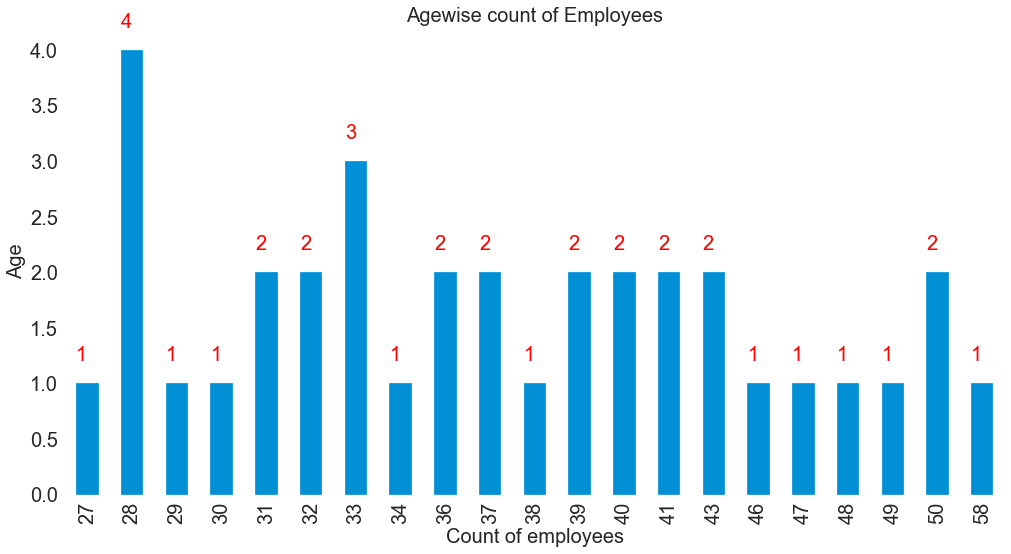

In [31]:
age_count = df.groupby(["Age"]).agg({"ID": pd.Series.nunique})
ax =age_count.plot(kind="bar",figsize=(15,8), legend=False,fontsize=20)

for i, j in enumerate(age_count.values):
    ax.text(i-.25, j +0.2, str(j[0]),color="red",fontsize=20)
ax.set_xlabel("Count of employees", fontsize=20)
ax.set_ylabel("Age",fontsize=20)
ax.set_title("Agewise count of Employees",fontsize=20)


plt.show()

##### From graph we can say above 50 age there is only 1 employee is there

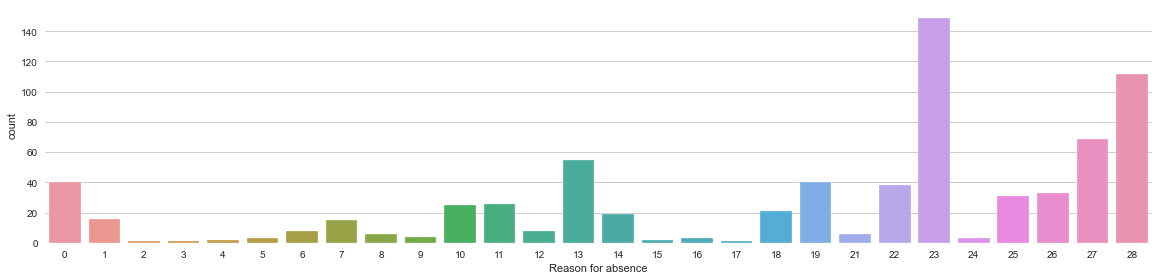

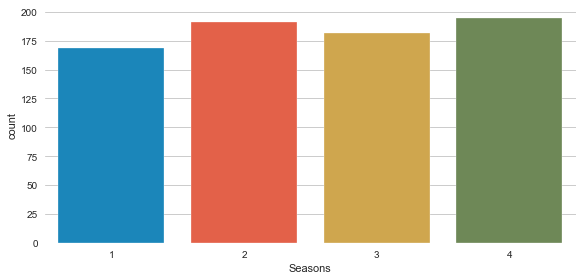

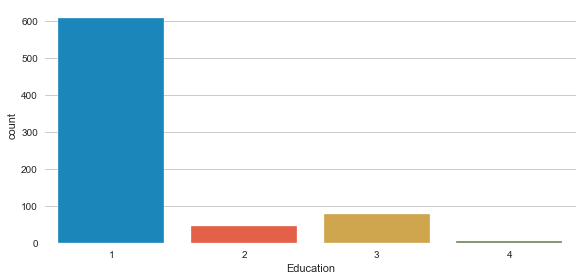

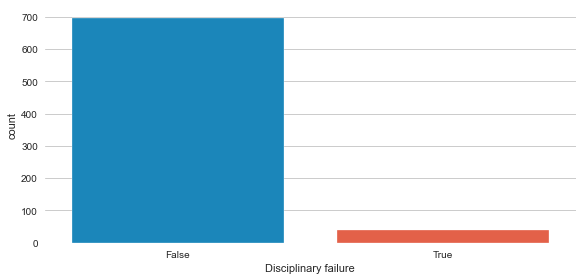

In [32]:
sns.set_style("whitegrid")
sns.factorplot(data=df, x="Reason for absence", kind="count",size=4,aspect=4)

sns.factorplot(data=df, x="Seasons", kind="count",size=4,aspect=2)
sns.factorplot(data=df, x="Education", kind="count",size=4,aspect=2)
sns.factorplot(data=df, x="Disciplinary failure", kind ="count", size=4, aspect=2)

##### From above graph we an say, less no. disciplinary failure, lower the education higher the absenteeism, all season have almost equal abenteesism,

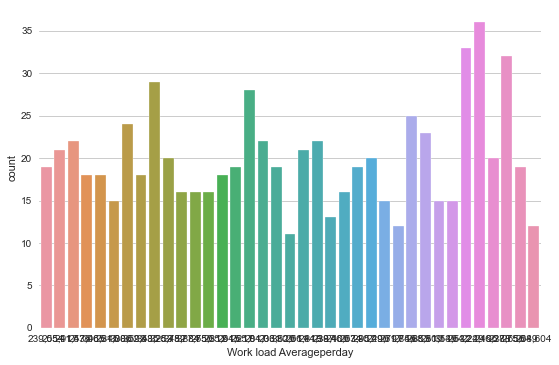

In [33]:
sns.countplot(x="Work load Averageperday", data=df)

### Education vs Employee Count

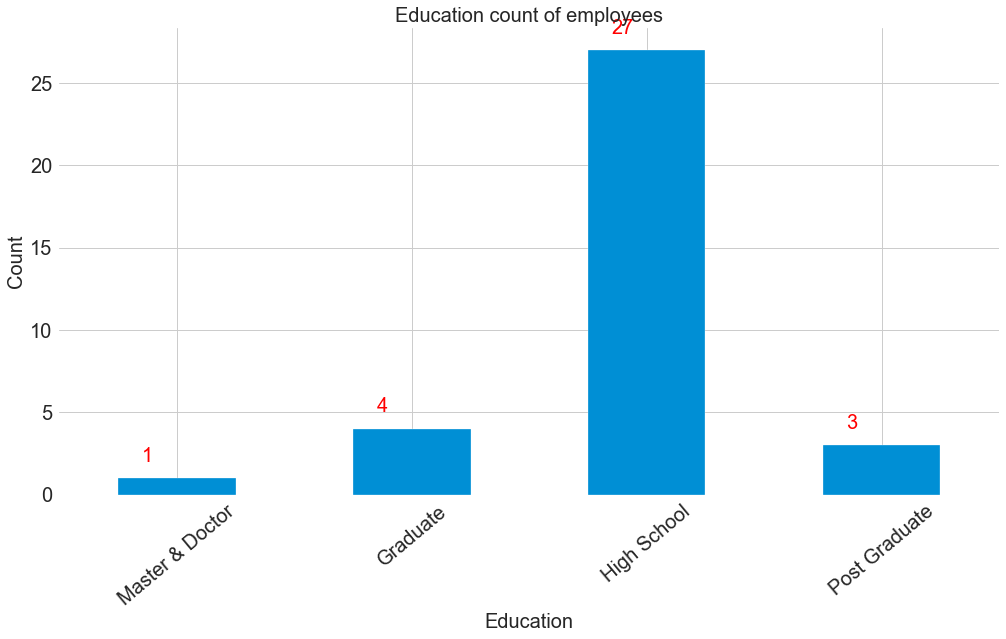

In [34]:
edu_count = df.groupby(["Education_detail"]).agg({"ID": pd.Series.nunique})

ax = edu_count.plot(kind="bar", figsize=(15,8), legend=False,fontsize=20)
for i, j in enumerate (edu_count.values):
    ax.text(i-.15, j + 1, str(j[0]), color="red",fontsize=20)
ax.set_xlabel("Education",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_title("Education count of employees",fontsize=20)
plt.xticks(rotation=40)
plt.show()

##### Above graph shows that High School educated employees are higher than others

In [35]:
edu_count

,ID
Education_detail,
Master & Doctor,1
Graduate,4
High School,27
Post Graduate,3


### Average workload vs Age
##### Work load Averageperday is object datatype, so we have to convert it to numeric by using label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
df["Work load Averageperday"] =LabelEncoder().fit_transform(df["Work load Averageperday"])

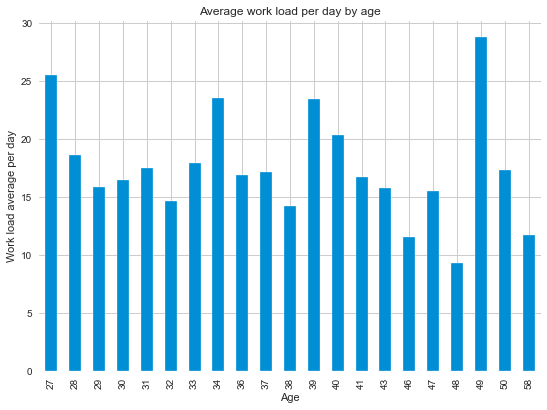

In [37]:
age_work_sum = df.groupby("Age", as_index=False)[["Work load Averageperday"]].mean()
ax = age_work_sum.plot(kind="bar",x ="Age", figsize=(8,6), legend = False)

for i, j in enumerate ((edu_count)):
    ax.set_ylabel("Work load average per day")
    ax.set_title("Average work load per day by age")
plt.show()

##### From above graph therre is no regualrity on workload agewise, older employee get the highest workload, while the middle aged employee have average work load

### Average Absenteeism hours by Age

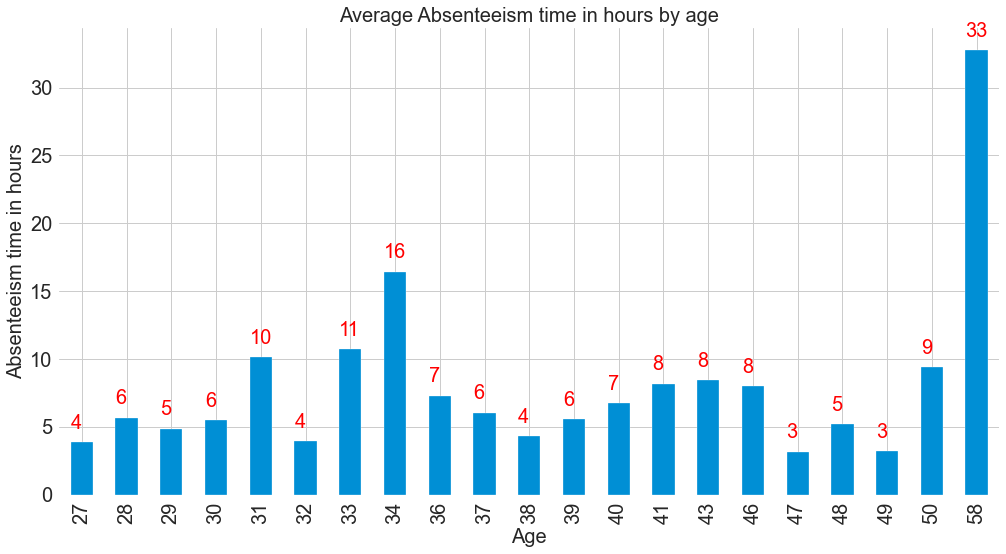

In [38]:
age_abs = df.groupby("Age")[["Absenteeism time in hours"]].mean()
ax = age_abs.plot(kind="bar", figsize=(15,8), legend=False,fontsize=20)

for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v+1, str(np.int(np.round(v))),color="red",fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Absenteeism time in hours",fontsize=20)
ax.set_title("Average Absenteeism time in hours by age",fontsize=20)
plt.show()

##### From above graph we can say the absenteeism to be almost same across age except for one age( 58)

## Average Absenteeism hours by distance to work

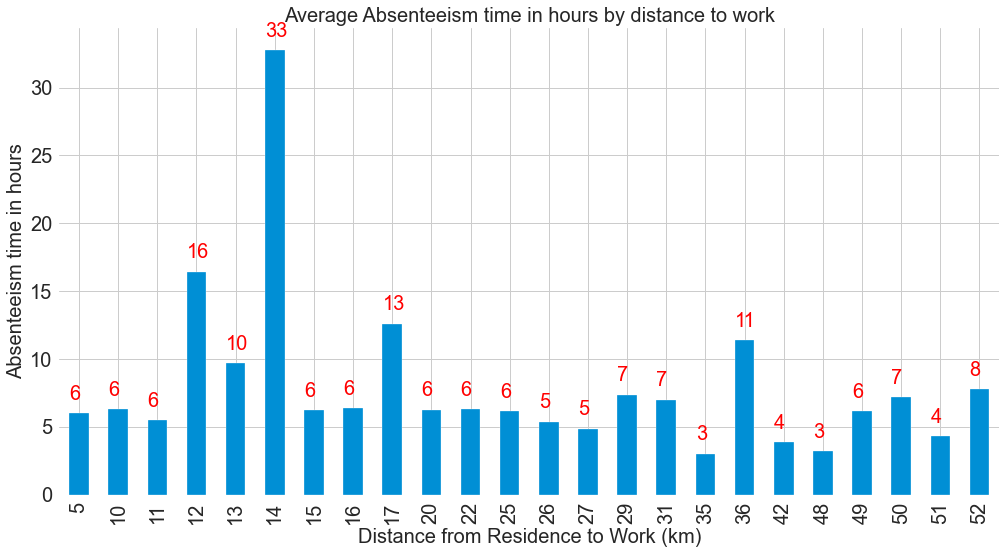

In [39]:
dis_abs =df.groupby("Distance from Residence to Work")[["Absenteeism time in hours"]].mean()
ax = dis_abs.plot(kind="bar", figsize=(15,8), legend=False,fontsize=20)

for i,j in enumerate (dis_abs.values):
    ax.text(i-.25, j+1, str(np.int(np.round(j))),color="red",fontsize=20)
ax.set_xlabel("Distance from Residence to Work (km)",fontsize=20)
ax.set_ylabel("Absenteeism time in hours",fontsize=20)
ax.set_title("Average Absenteeism time in hours by distance to work",fontsize=20)
plt.show()

### Generally we think, employees who stay far from office, they will be absent more but from this graph its totally opposite

## Average distance to work by Age

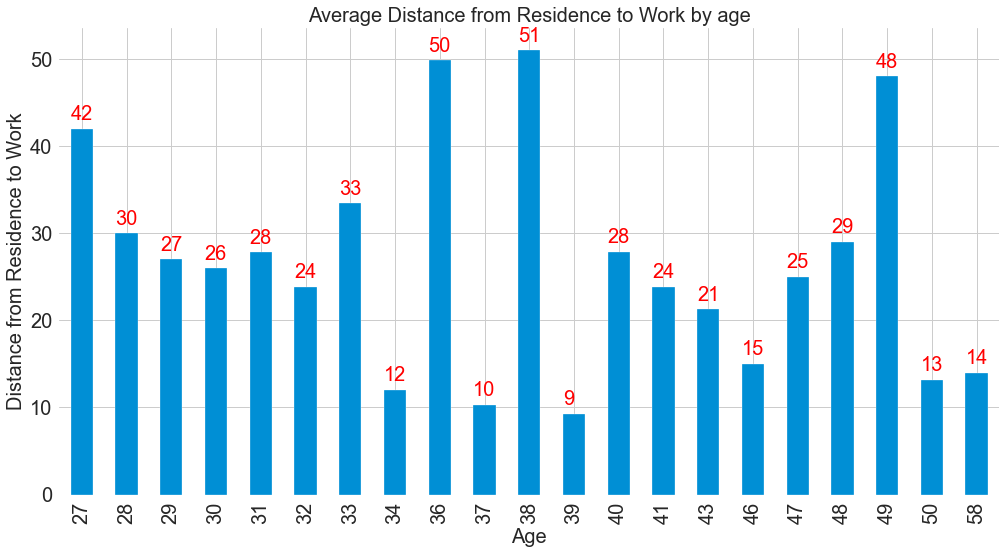

In [40]:
age_dis = df.groupby("Age")[["Distance from Residence to Work"]].mean()
ax = age_dis.plot(kind="bar", figsize=(15,8), legend=(False),fontsize=20)
for i,j in enumerate(age_dis.values):
    ax.text(i-.25, j +1, str(np.int(np.round(j))),color="red",fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Distance from Residence to Work",fontsize=20)
ax.set_title("Average Distance from Residence to Work by age",fontsize=20)
plt.show()

### Higher age employees might stay closer to the office, but from graph we can't say that. Actuallly the values are not significant/relevant to compare, or we can say its totally random.

## Average Transportation expense by Distance

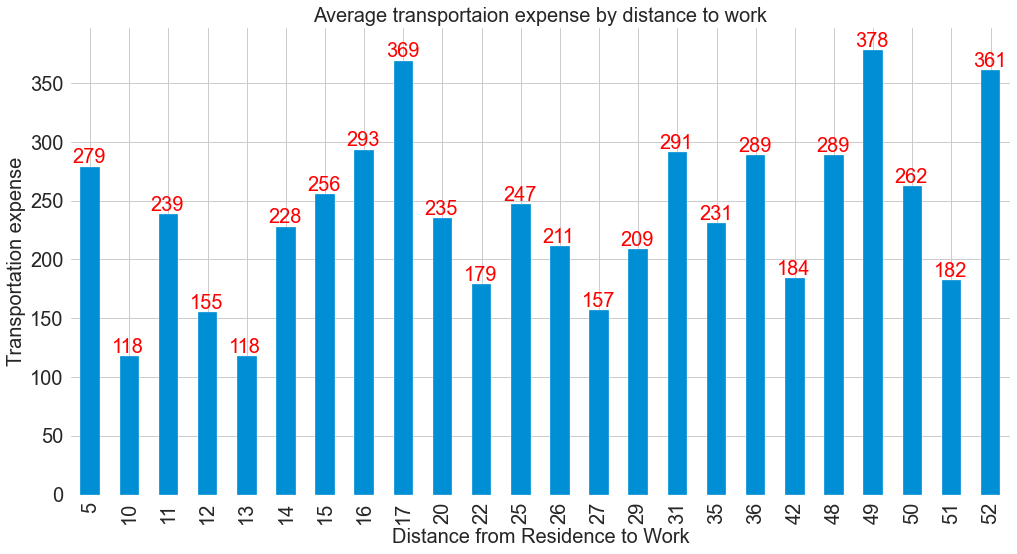

In [41]:
dis_exp =df.groupby("Distance from Residence to Work")[["Transportation expense"]].mean()
ax = dis_exp.plot(kind="bar", figsize=(15,8), legend=False,fontsize=20)
for i,j in enumerate(dis_exp.values):
    ax.text(i-.45, j+3, str(np.int(np.round(j))),color="red",fontsize=20)
ax.set_xlabel("Distance from Residence to Work",fontsize=20)
ax.set_ylabel("Transportation expense",fontsize=20)
ax.set_title("Average transportaion expense by distance to work",fontsize=20)
plt.show()

### Generally when the distance increases then the expense also increases, but from above graph it's not going naturally. Regardless we don't have transport mode,so might not be helping us

## Pet & Son counts by age

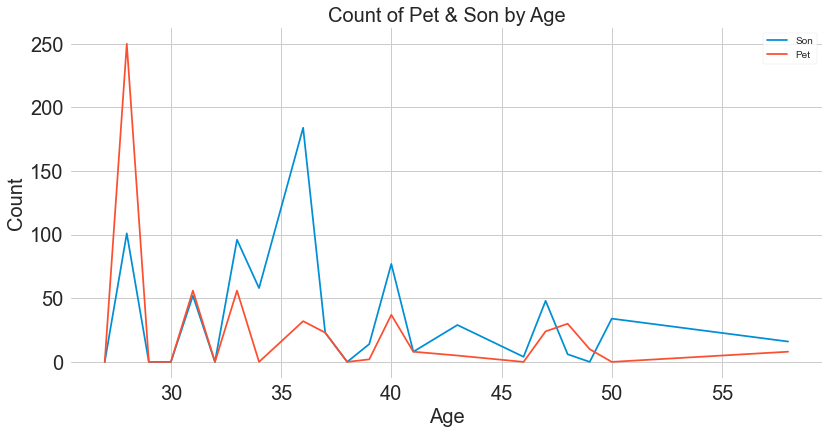

In [42]:
ax = df.groupby("Age")["Son","Pet"].sum().plot(figsize=(12,6),fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_title("Count of Pet & Son by Age",fontsize=20)
plt.show()

### From above graph, we can clearly see that if a employee having son then there is high chances for having pet.

## Now we see about Smoker & Drinker Stats

In [43]:
emp_social = df.groupby(["ID","Social drinker", "Social smoker"])[["Social drinker", "Social smoker"]].count()
emp_social = df.drop_duplicates(["ID","Social drinker","Social smoker"])[["ID","Social drinker","Social smoker"]]

emp_social[emp_social["Social drinker"]==True]["Social smoker"].mean()

0.2222222222222222

In [44]:
emp_social[emp_social["Social smoker"]==True]["Social drinker"].mean()

0.5714285714285714

### from above 2 result we understand, 
### those who are social drinker they are also smokers is 0.22 percent
### those who are Social smoker are also drinkers is 0.57 percent

## Absenteeism by Social habits

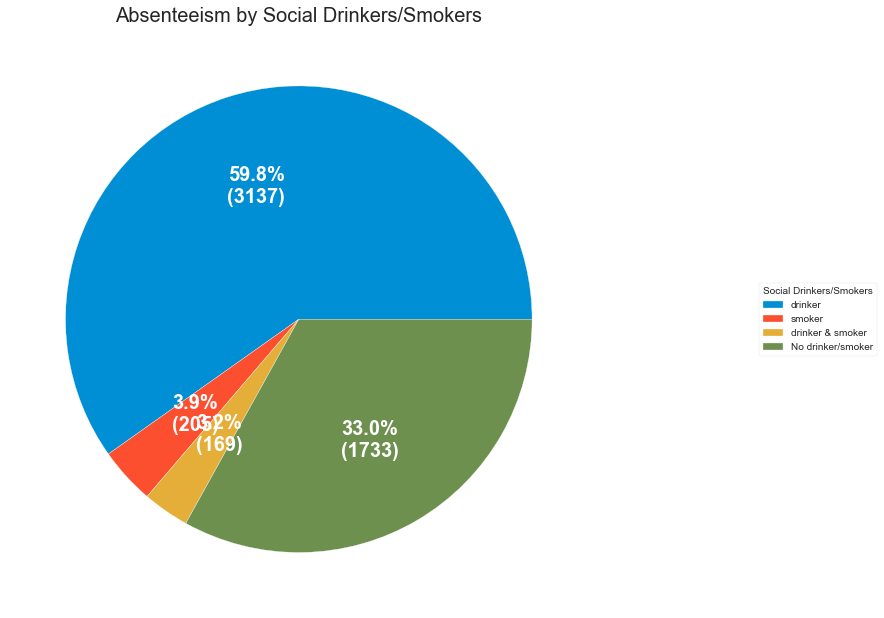

In [45]:
drink_sum =df[(df["Social drinker"] == True) & (df["Social smoker"]==False)]["Absenteeism time in hours"].sum()
smok_sum =df[(df["Social drinker"] == False) & (df["Social smoker"] == True)]["Absenteeism time in hours"].sum()

drink_smok_sum = df[(df["Social drinker"]==True) & (df["Social smoker"]==True)]["Absenteeism time in hours"].sum()
abs_sum = df[(df["Social drinker"] == False) & (df["Social smoker"]==False)]["Absenteeism time in hours"].sum()

absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ["drinker","smoker","drinker & smoker","No drinker/smoker"]
fig, ax = plt.subplots(figsize=(15,10),subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct,absolute)
wedges, texts, autotexts = ax.pie(absen, autopct = lambda pct: func(pct, absen), textprops=dict(color="w"))
ax.legend(wedges,pie_labels,title="Social Drinkers/Smokers", loc="right", bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=10, weight="bold", fontsize=20)
ax.set_title("Absenteeism by Social Drinkers/Smokers",fontsize=20)
plt.show()

### 60% drinkers
### 33% No drinker/Smoker
### above are the percentage of absent employee

## Absenteeism by Reason/ Medical problems

In [46]:
reason_abs =df.groupby("reason_text", as_index=False)["Absenteeism time in hours"].sum()
with pd.option_context("display.max_colwidth", -1):
    display(reason_abs.sort_values("Absenteeism time in hours", ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Diseases of musculoskeletal system and connective tissue,842
"Injury, poisoning and certain other consequences of external causes",729
Medical consultation,424
Dental consulatation,335
Diseases of the digestive system,297
Patient follow-up,293
Diseases of respiratory system,276
Unjustified absence,240
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",217
Diseases of the skin and subcutaneous tissue,187


### From above details majorly top 3 reason frequently used for absenteeism by employees

## Absenteeism by Seasons

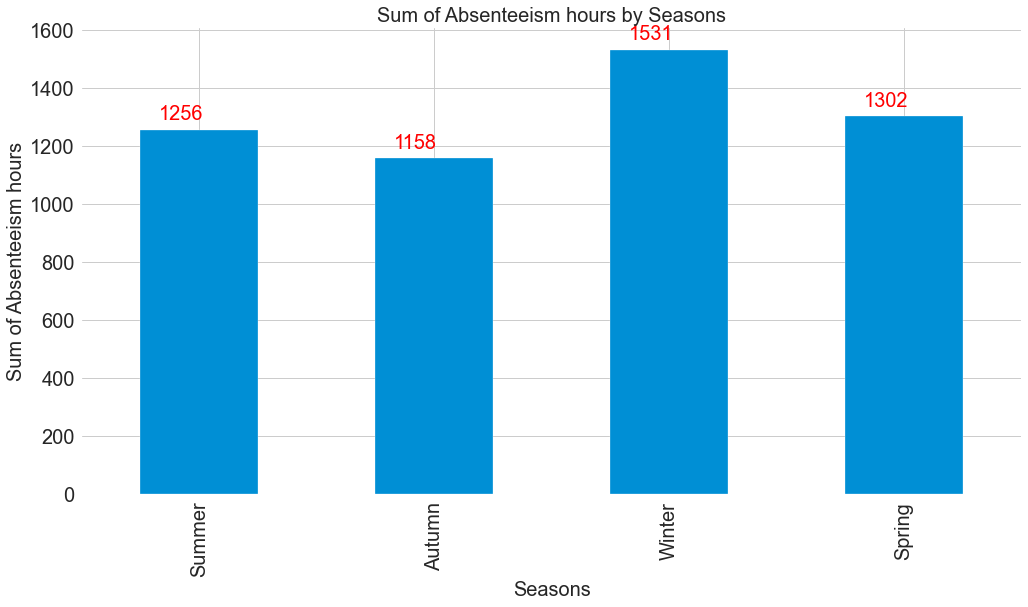

In [47]:
season_abs = df.groupby("season_name")["Absenteeism time in hours"].sum()
ax = season_abs.plot(kind = "bar", figsize=(15,8), legend=False,fontsize=20)
for i,j in enumerate(season_abs.values):
    ax.text(i-.17, j+35, str(np.int(np.round(j))),color="red",fontsize=20)
ax.set_xlabel("Seasons",fontsize=20)
ax.set_ylabel("Sum of Absenteeism hours",fontsize=20)
ax.set_title("Sum of Absenteeism hours by Seasons",fontsize=20)
plt.show()

### Winter Season has maximum Highest Absenteeism, and Autumn Season having lowest Absenteeism

## Absenteeism by Month

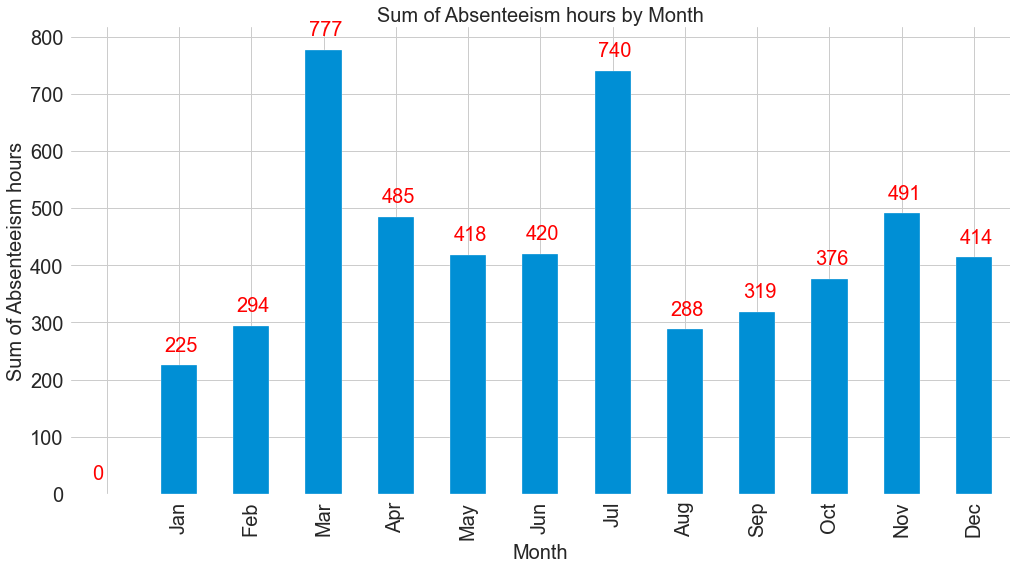

In [48]:
month_abs = df.groupby("month_name")["Absenteeism time in hours"].sum()
ax = month_abs.plot(kind="bar", figsize=(15,8),legend=False, fontsize=20)
for i, j in enumerate(month_abs.values):
    ax.text(i-0.2, j+25, str(np.int(np.round(j))),color="red",fontsize=20)
ax.set_xlabel("Month",fontsize=20)
ax.set_ylabel("Sum of Absenteeism hours",fontsize=20)
ax.set_title("Sum of Absenteeism hours by Month",fontsize=20)
plt.show()

### From season to months looks like March & July has the highest number of Absenteeism hours

## Now we are going to find out the reason in March & July for Absenteeism

[Text(1, 0.5, 'Weight'),
 Text(1, 1.5, 'Body mass index'),
 Text(1, 2.5, 'Service time'),
 Text(1, 3.5, 'Age'),
 Text(1, 4.5, 'Distance from Residence to Work'),
 Text(1, 5.5, 'Social drinker'),
 Text(1, 6.5, 'ID'),
 Text(1, 7.5, 'Hit target'),
 Text(1, 8.5, 'Height'),
 Text(1, 9.5, 'Absenteeism time in hours'),
 Text(1, 10.5, 'Son'),
 Text(1, 11.5, 'Transportation expense'),
 Text(1, 12.5, 'Pet'),
 Text(1, 13.5, 'Work load Averageperday'),
 Text(1, 14.5, 'Disciplinary failure'),
 Text(1, 15.5, 'Social smoker')]

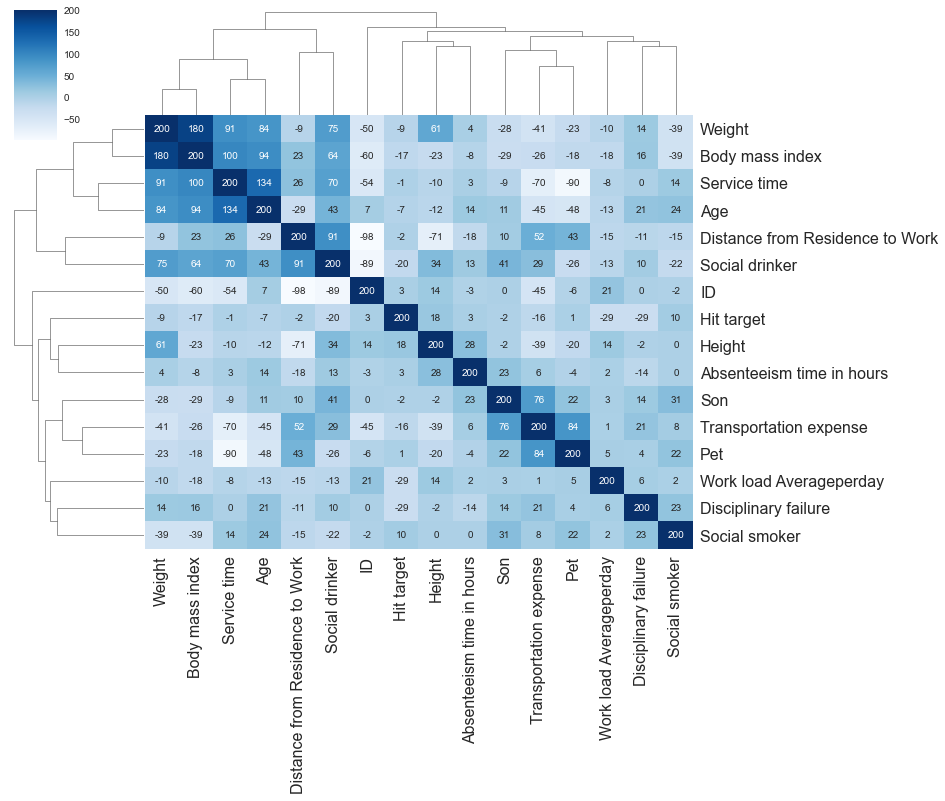

In [49]:

corr = df.corr().mul(200).astype(int)
g = sns.clustermap(data=corr, annot=True, fmt="d", cmap="Blues",figsize=(12,10))
cmap=sns.diverging_palette(h_neg=200, h_pos=350, s=90,l=0,as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=16)


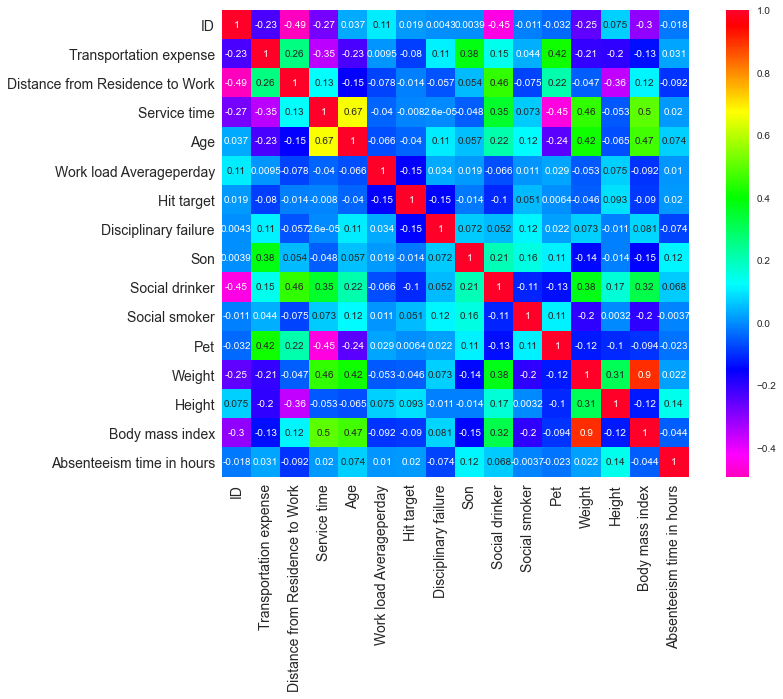

In [50]:
plt.figure(figsize=(12,8))
heat = sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap="gist_rainbow_r")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### From heatmap Weight & Body mass index is highly correlated, moreover weight divides with square of an height

In [51]:
mar_abs  = df[df["Month of absence"]==3].groupby("reason_text", as_index=False)["Absenteeism time in hours"].sum()
with pd.option_context("display.max_colwidth", -1):
    display(mar_abs.sort_values("Absenteeism time in hours", ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
"Injury, poisoning and certain other consequences of external causes",147
Diseases of musculoskeletal system and connective tissue,136
Diseases of the skin and subcutaneous tissue,112
Diseases of the digestive system,72
Patient follow-up,56
Dental consulatation,43
Physiotherapy,41
Diseases of genitourinary system,33
Medical consultation,28
Unjustified absence,16


In [52]:
jul_abs = df[df["Month of absence"]==7].groupby("reason_text", as_index=False)["Absenteeism time in hours"].sum()
with pd.option_context("display.max_colwidth", -1):
    display(jul_abs.sort_values("Absenteeism time in hours", ascending=False).style.hide_index())
    

reason_text,Absenteeism time in hours
Diseases of the nervous system,128
Diseases of the circulatory system,112
"Injury, poisoning and certain other consequences of external causes",98
Diseases of musculoskeletal system and connective tissue,88
Patient follow-up,72
Unjustified absence,56
Certain infectious and parasitic diseases,40
Medical consultation,24
Diseases of the digestive system,21
Dental consulatation,18


### Reason for Absenteeism in both March & July month are not same 

## Now we are biuld the Model, but before that we have transform & split  our data to fit in our Model

In [53]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [54]:
from sklearn.preprocessing import StandardScaler

X= df.drop("Absenteeism time in hours", axis=1)
y= df["Absenteeism time in hours"]

X =StandardScaler().fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(589, 24) (589,)
(148, 24) (148,)


## Model Creation

### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

dt_model = DecisionTreeRegressor(random_state =1).fit(X_train,y_train)
dt_predictions = dt_model.predict(X_test)

df_dt = pd.DataFrame({"actual": y_test, "pred": dt_predictions})
print(df_dt.head())

def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

print("Root Mean Squared Error: "+str(RMSE(y_test,dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,dt_predictions)))


     actual  pred
504       1   6.0
558       0   4.0
560       2   2.0
577       2   0.0
276       2   2.0
Root Mean Squared Error: 2.338355277840689
R^2 Score(coefficient of determination) = 0.33198543150520643


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators= 500,random_state=1).fit(X_train,y_train)

rf_predictions = rf_model.predict(X_test)

df_rf = pd.DataFrame({"actual": y_test, "pred": rf_predictions})
print(df_rf.head())

print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score (coefficient of derermination) = "+str(r2_score(y_test,rf_predictions)))

     actual      pred
504       1  4.260333
558       0  3.135500
560       2  1.745810
577       2  4.571000
276       2  2.032000
Root Mean Squared Error: 2.1464410445422866
R^2 Score (coefficient of derermination) = 0.43713678104216924


### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
df_lr = pd.DataFrame({"actual": y_test, "pred":lr_predictions})
print(df_lr.head())
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual      pred
504       1  1.938508
558       0  2.744237
560       2  2.855061
577       2  3.090124
276       2  2.086511
Root Mean Squared Error: 2.5087960929336095
R^2 Score(coefficient of determination) = 0.23105430368524582


## Dimension Reduction using PCA


In [59]:
target = df["Absenteeism time in hours"]

#### We are defining a new target variable for better analysis  

In [60]:
df.shape

(737, 25)

#### New column is created.
#### Now we are going to  converting a data into numpy array for PCA

In [61]:
from sklearn.decomposition import PCA

X = df.values

pca = PCA(n_components=25)
pca.fit(X)

PCA(n_components=25)

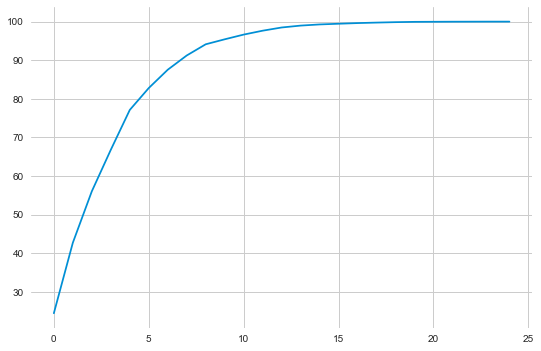

In [62]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

plt.plot(var1)
plt.show()

#### Now again we are going to split the data with new column named target

In [63]:
pca = PCA(n_components=25)
pca.fit(X)
X_train,X_test,y_train,y_test = train_test_split(X,target, test_size=0.2, random_state=1)

### Decision Tree

In [64]:
dt_model = DecisionTreeRegressor(random_state=1).fit(X_train,y_train)
dt_predictions - dt_model.predict(X_test)


# create the dataframe for actual and  predicted values

df_dt = pd.DataFrame({"actual":y_test, "pred":dt_predictions})
print(df_dt.head())

print("Root Mean Squared Error: "+str(RMSE(y_test,dt_predictions)))
print("R^2 Score (coefficient of determination) = "+str(r2_score(y_test,dt_predictions)))

     actual  pred
310       6   6.0
349       6   4.0
429       3   2.0
517       2   0.0
195       0   2.0
Root Mean Squared Error: 3.9033221009062813
R^2 Score (coefficient of determination) = -0.9446186058797941


### Random Forest

In [65]:
rf_model = RandomForestRegressor(n_estimators = 500, random_state=1, oob_score=True, n_jobs=-1).fit(X_train,y_train)

rf_predictions = rf_model.predict(X_test)

dt_rf = pd.DataFrame({"actual": y_test, "pred":rf_predictions})
print(df_rf.head())

print("Root Mean Squared Error: "+str(RMSE(y_test,rf_predictions)))
print("R2 Score(coefficient of determination) = "+str(r2_score(y_test,rf_predictions)))

     actual      pred
504       1  4.260333
558       0  3.135500
560       2  1.745810
577       2  4.571000
276       2  2.032000
Root Mean Squared Error: 0.048385557371618246
R2 Score(coefficient of determination) = 0.9997011886071229


## Linear Regression

In [66]:
lr_model = LinearRegression().fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

df_lr = pd.DataFrame({"actual": y_test, "pred": lr_predictions})
print(df_lr.head())

print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,lr_predictions)))
print()

     actual      pred
310       6  1.938508
349       6  2.744237
429       3  2.855061
517       2  3.090124
195       0  2.086511
Root Mean Squared Error: 3.29304233949983
R^2 Score(coefficient of determination) = -0.3840771048193199



### KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
KNN_predictions = KNN_model.predict(X_test)

df_KNN = pd.DataFrame({"actual": y_test,"pred":KNN_predictions})
print(df_KNN.head())

print("Root Mean Squared Error: "+str(RMSE(y_test,KNN_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,KNN_predictions)))



     actual      pred
310       6  5.000000
349       6  3.000000
429       3  4.666667
517       2  6.000000
195       0  1.333333
Root Mean Squared Error: 2.1403460190074597
R^2 Score(coefficient of determination) = 0.4152992727950774


### XGBoost

In [68]:
import xgboost as xgb
from sklearn import metrics
xgb_model = xgb.XGBClassifier(max_depth=10, learning_rate=0.08, objective="binary:logistic", n_jobs= -1,)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
df_xgb = pd.DataFrame({"actual": y_test,"pred":xgb_predictions})
print(df_xgb.head())
xgb_accuracy = round(metrics.accuracy_score(y_test, xgb_predictions) *100,2)
print("Root Mean Squared Error: "+str(RMSE(y_test, xgb_predictions)))
print("R^2 Score(coeffiecient of determination) = "+str(r2_score(y_test,xgb_predictions)))
print("Accuracy:"+ str(xgb_accuracy))

     actual  pred
310       6     6
349       6     6
429       3     3
517       2     2
195       0     0
Root Mean Squared Error: 0.4793012932694108
R^2 Score(coeffiecient of determination) = 0.9706787245944434
Accuracy:97.97


In [69]:
from sklearn.metrics import confusion_matrix

con_mat_xgb_model = confusion_matrix(y_test,xgb_predictions)
con_mat_xgb_model

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         1
          10       0.33      1.00      0.50         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.98       148
   macro avg       0.68      0.77      0.71       148
weighted avg       0.97      0.98      0.97       148



## Saving model
##### we are going save xgb boost classifier model due its highest accuracy & better R2 score also

In [71]:
import joblib
joblib.dump(xgb_model,"xgb_Predicted Absenteeism.pkl")

['xgb_Predicted Absenteeism.pkl']

##  Conclusion:
##### XGBoost model is best model among all with 98% accuracy and almost 1 r2 score. There is 2 months (March & july) in which employee has absent more as compare to other months, in this those who have lower education have more absenteeism hours as per our data only.